In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np


In [2]:
peak_area_filename = "../data/09_25_20_hamster_samples_pHILIC_peak_areas.csv"
experiment_parameters = "../data/experiment_parameters_hamster_pHILIC.csv"

In [6]:
data = pd.read_csv(peak_area_filename)
data

,Compound Name,Compound Group,Formula,Mass,RT,CAS ID,blank-1_6540,blank-2_6540,blank-3_6540,L1 H-472_1M_6540,...,L40 H-497_16F_6540,L5 H-475_5M_6540,L6 H-490_6M_6540,L7 H-501_7M_6540,L8 H-489_8M_6540,L9 H-494_1C_6540,QC-L pool-1_6540,QC-L pool-2_6540,QC-L pool-3_6540,QC-L pool-4_6540
0,1_(Z)-3-Hydroxyoctadec-7-enoic acid,covid_id_updated,C18H34O3,298.250795,0.82,NaN,5227,17457,23242,317098,...,1055357,740901,481722,599330,375391,369224,22513,346783,1859915,279961
1,2_1 5 Anhydro D glucitol,covid_id_updated,C6H12O5,164.068474,4.58,NaN,2434,1891,2030,116453,...,230675,154528,102997,160660,157916,193781,3376,198836,134435,156936
2,5_14 Z Eicosenoic acid,covid_id_updated,C20H38O2,310.287181,0.79,NaN,2745,3279,3708,35079,...,108761,159274,78629,61336,41296,61920,4165,55025,142362,37137
3,6_16 Hydroxyhexadecanoic acid,covid_id_updated,C16H32O3,272.235145,0.82,NaN,15266,4962,20167,511888,...,752288,987782,570002,600980,555821,616374,23378,442778,746658,362152
4,8_2 Aminoadipic acid,covid_id_updated,C6H11NO4,161.068808,6.85,NaN,724,1097,825,25691,...,21427,23944,32006,19071,25478,25776,1690,23728,18538,23928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,238_Skatole,iHILICpos,C9H9N,131.073499,4.69,NaN,3087,2944,2880,75462,...,54280,56226,75439,56172,48928,34792,76374,66966,55314,66326
194,239_Taurine,iHILICpos,C2H7NO3S,125.014664,6.17,NaN,1664,1578,1445,23157976,...,23667788,30220338,27826872,20023724,16817188,18464744,24548088,24728708,22337752,21356994
195,242_trans 3 Indoleacrylic acid,iHILICpos,C11H9NO2,187.063329,4.67,NaN,2933,3748,3766,3403534,...,3289655,3350703,3848672,2647375,1624559,1936637,3567970,3030038,3405147,3446572
196,N-methyl nicotinamide,NMN,C7H8N2O,136.063663,10.43,NaN,9014,4386,4856,445489,...,349377,569316,596777,340987,260056,269516,352473,404755,374971,361361


In [16]:
sample_info = pd.read_csv(experiment_parameters,index_col=1)
sample_info

,#,Grouping,Sample Information,Group,Day post infection,Group-day
Sample name,,,,,,
L1 H-472_1M_6540,1,Lung,Mock (Day 4),Mock,4,Mock_d4
L2 H-507_2M_6540,2,Lung,Mock (Day 4),Mock,4,Mock_d4
L3 H-464_3M_6540,3,Lung,Mock (Day 4),Mock,4,Mock_d4
L4 H-482_4M_6540,4,Lung,Mock (Day 4),Mock,4,Mock_d4
L5 H-475_5M_6540,7,Lung,Mock (Day 14),Mock,14,Mock_d14
L6 H-490_6M_6540,8,Lung,Mock (Day 14),Mock,14,Mock_d14
L7 H-501_7M_6540,9,Lung,Mock (Day 14),Mock,14,Mock_d14
L8 H-489_8M_6540,10,Lung,Mock (Day 14),Mock,14,Mock_d14
L10 H-513_2C_6540,13,Lung,SARS-CoV-2 Day 2 post-infection,SARS-CoV-2,2,SARS-CoV-2_d2


In [116]:
mol_names = data["Compound Name"].values
samples = sample_info.index.values
area_cols = [x for x in data.columns.values if x in samples]
print(len(area_cols),len(samples))
data_matrix = np.log2(data[area_cols].transpose())
data_matrix.columns = np.array(mol_names)

samplesOfInterest = [x for x in data_matrix.index.values if sample_info.at[x,"Group"] in ["SARS-CoV-2","Influenza","Mock"] and sample_info.at[x,"Day post infection"] in [4]]
print(len(samplesOfInterest))
data_matrix = data_matrix.loc[samplesOfInterest,:]

def marker(ty):
    if ty == "Influenza":
        return 1
    elif ty == "SARS-CoV-2":
        return 2
    else:
        return 0
sample_kind_mapping = [marker(sample_info.at[x,"Group"]) for x in data_matrix.index.values]
influenza_samples = [x for x in range(len(sample_kind_mapping)) if sample_kind_mapping[x] == 1]
covid_samples = [x for x in range(len(sample_kind_mapping)) if sample_kind_mapping[x] == 2]
mock_samples = [x for x in range(len(sample_kind_mapping)) if sample_kind_mapping[x] == 0]

alpha = 0.05
sig_mets = []
for x in range(len(mol_names)):
    sub = data_matrix[mol_names[x]]
    stat,pval = stats.f_oneway(sub[influenza_samples],sub[covid_samples],sub[mock_samples])
    if pval < alpha/len(mol_names):
        sig_mets.append(x)
print(len(sig_mets))
order = list(range(len(data_matrix)))
order.sort(key=lambda x: sample_kind_mapping[x])
data_matrix_sorted = data_matrix.iloc[order,sig_mets]

40 40
12
2


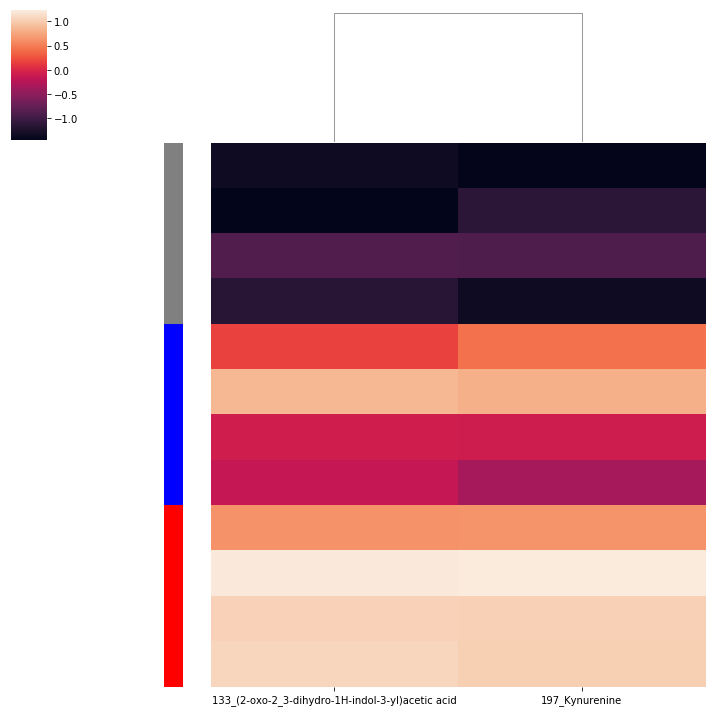

In [117]:
colors = ["grey","blue","red"]
sb.clustermap(data_matrix_sorted,row_cluster=False,row_colors=[colors[sample_kind_mapping[x]] for x in order],z_score=1,yticklabels=False)